In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import statistics as stats

In [2]:
%ls

customer_churn.csv      imbalanced_data.ipynb   sql_tableau_python.csv


## Import Csv

In [3]:
df= pd.read_csv('customer_churn.csv')

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
## Split the variables x to the y
y = df['Churn']
df_x = df[['tenure', 'MonthlyCharges', 'SeniorCitizen']]
df_x

,tenure,MonthlyCharges,SeniorCitizen
0,1,29.85,0
1,34,56.95,0
2,2,53.85,0
3,45,42.30,0
4,2,70.70,0
...,...,...,...
7038,24,84.80,0
7039,72,103.20,0
7040,11,29.60,0
7041,4,74.40,1


## EDA 

/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


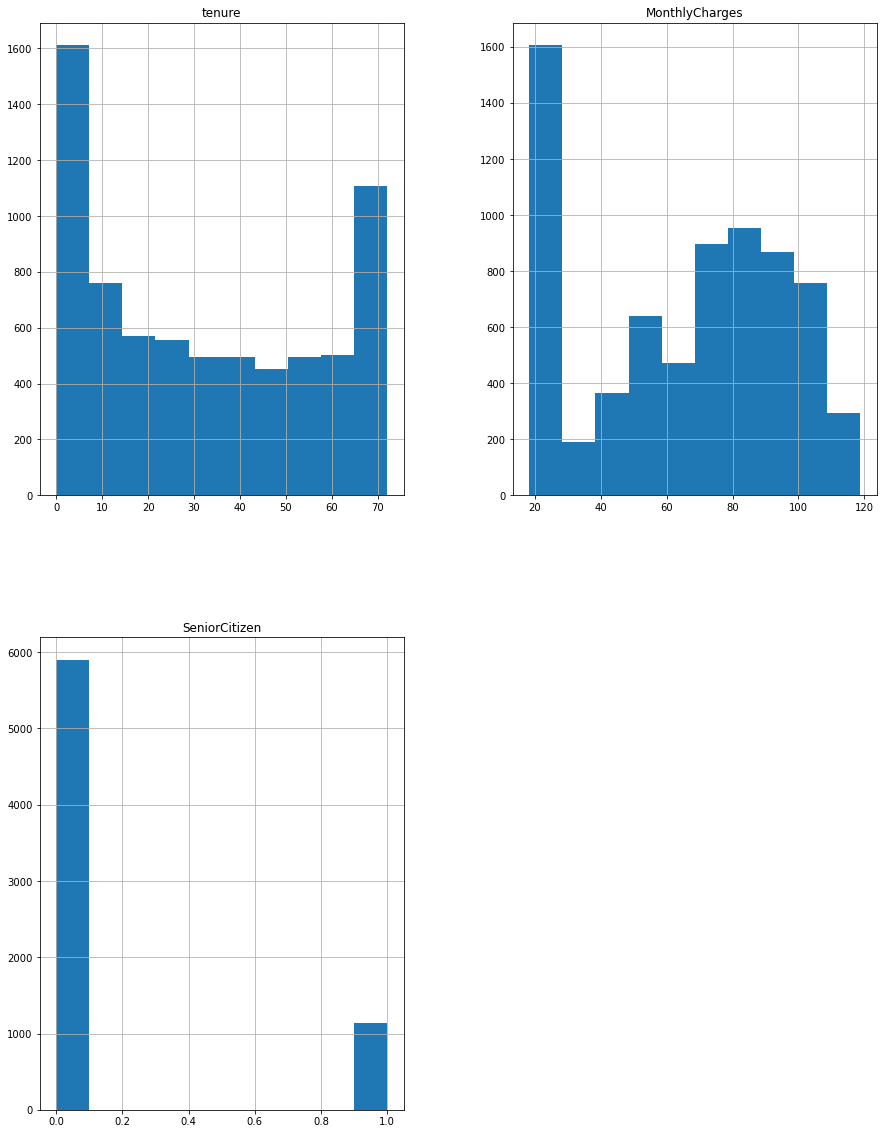

In [6]:
df_x.hist(figsize = (15,20));
plt.show()
#senior citizen has outliers cm has outlier to remove

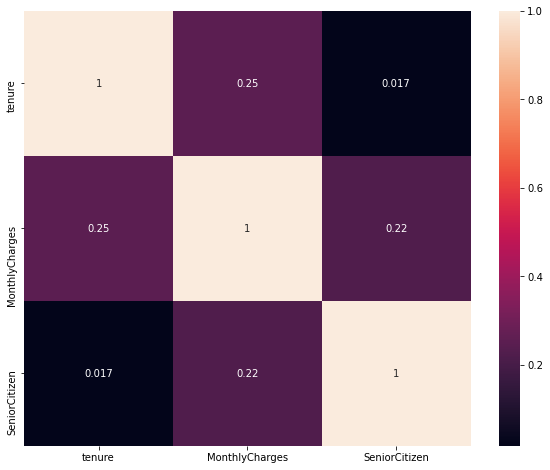

In [7]:
# check for multicollinearity 
corr_matrix=df_x.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='SeniorCitizen'>

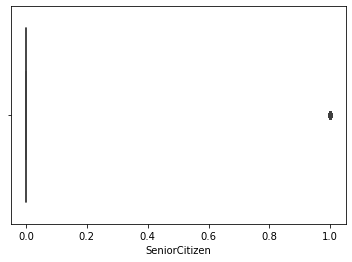

In [8]:
sns.boxplot(x=df_x['SeniorCitizen'])

In [11]:
#option 2 standardising all numeric features / rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(df_x)
x_standardized = transformer.transform(df_x)
print(x_standardized.shape)


(7043, 3)


/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


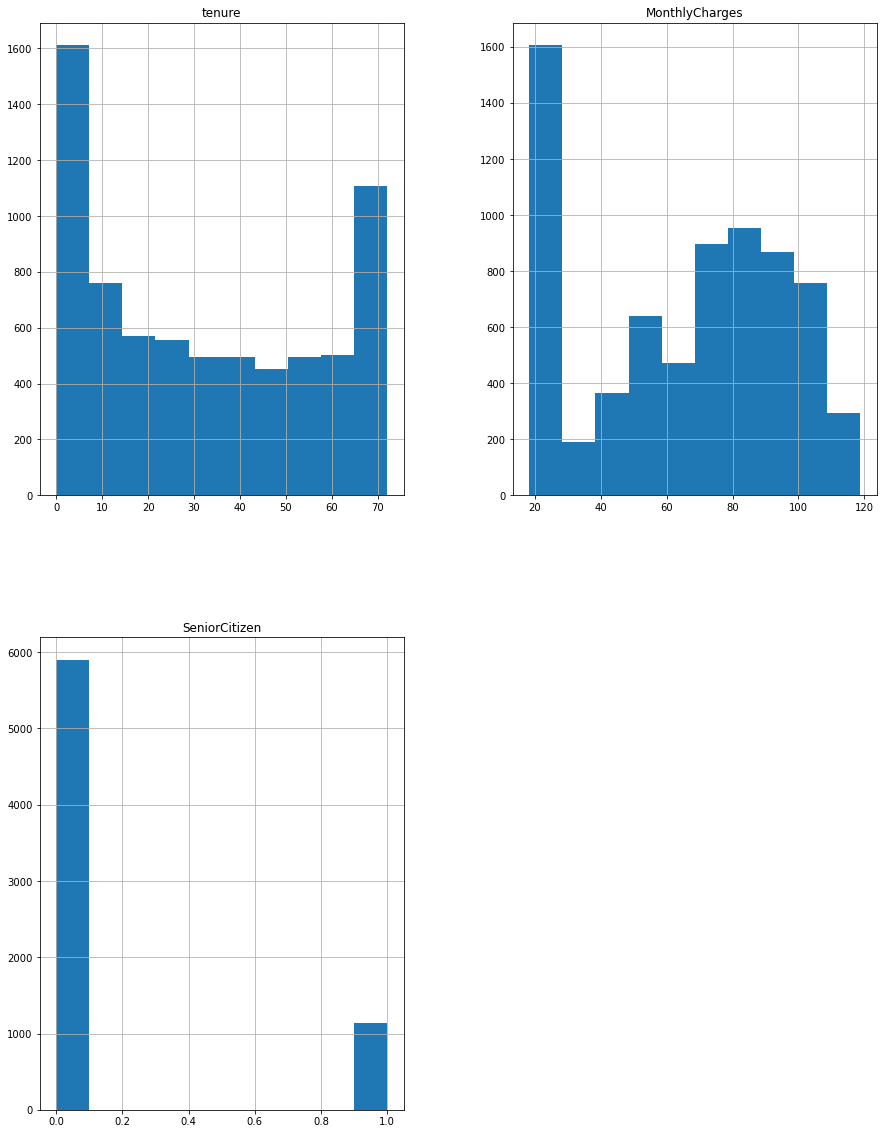

In [12]:
df_x.hist(figsize = (15,20));
plt.show()

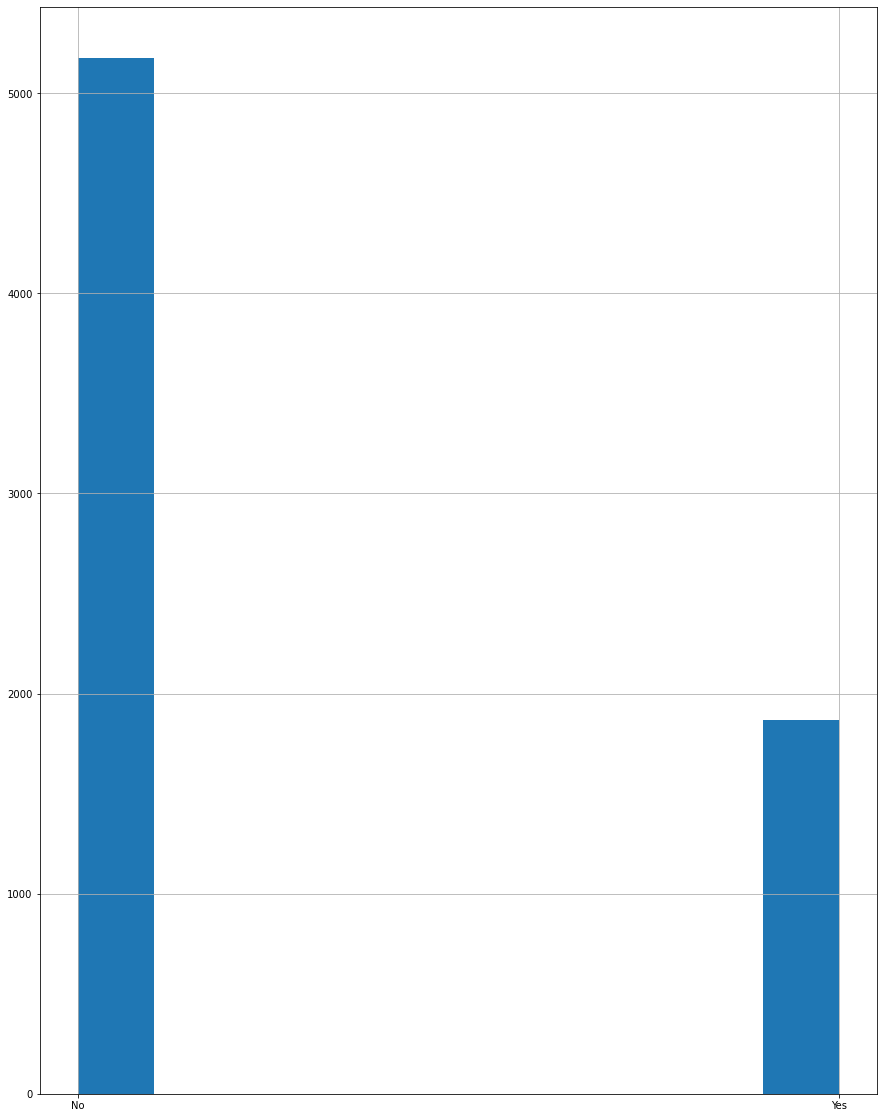

In [23]:
y.hist(figsize = (15,20));
plt.show()

In [ ]:
## apply model and train model and split

In [15]:
from sklearn.linear_model import LogisticRegression
X = df_x

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.3, random_state=40)

In [17]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

## evaluate accuracy and test


In [18]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [19]:
predictions

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [20]:
accuracy_score(y_test, predictions)

0.7832465688594415

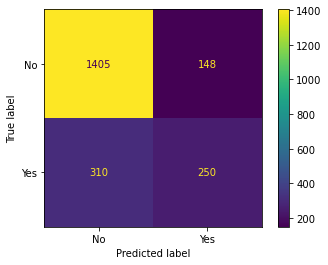

In [21]:
# now we the test the model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [24]:
# now we try to deal with the unbalanced data
from imblearn.over_sampling import SMOTE